In [1]:
import pandas as pd
df= pd.read_excel("/content/insurance_claims.xlsx")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


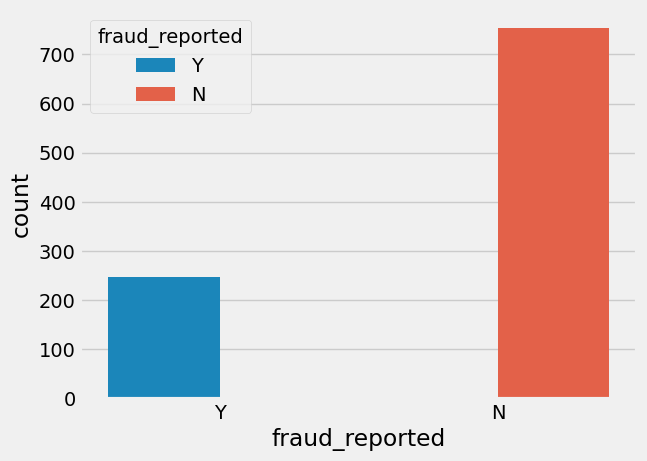

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Data Preprocessing
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')
plt.show()


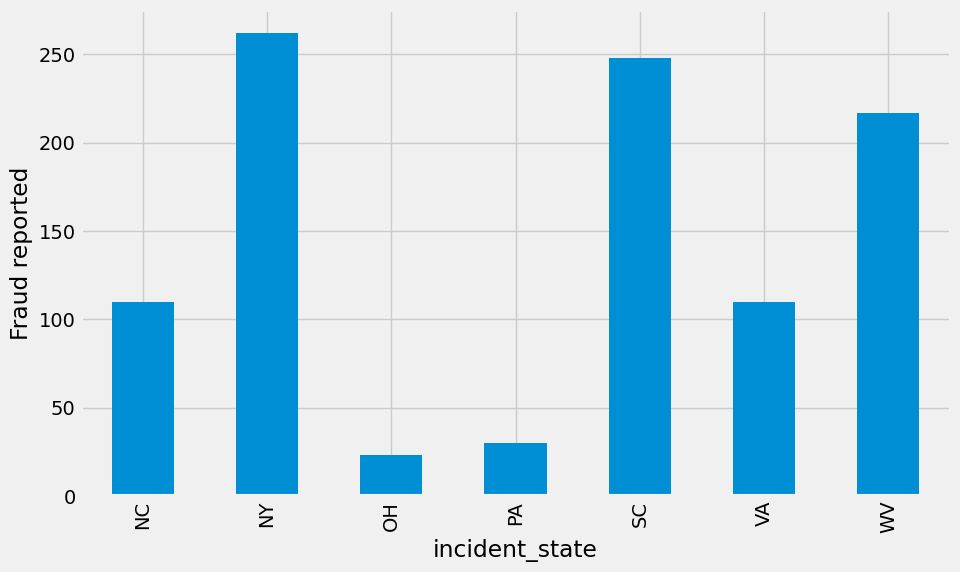

In [3]:
fig=plt.figure(figsize=(10,6))
ax=df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

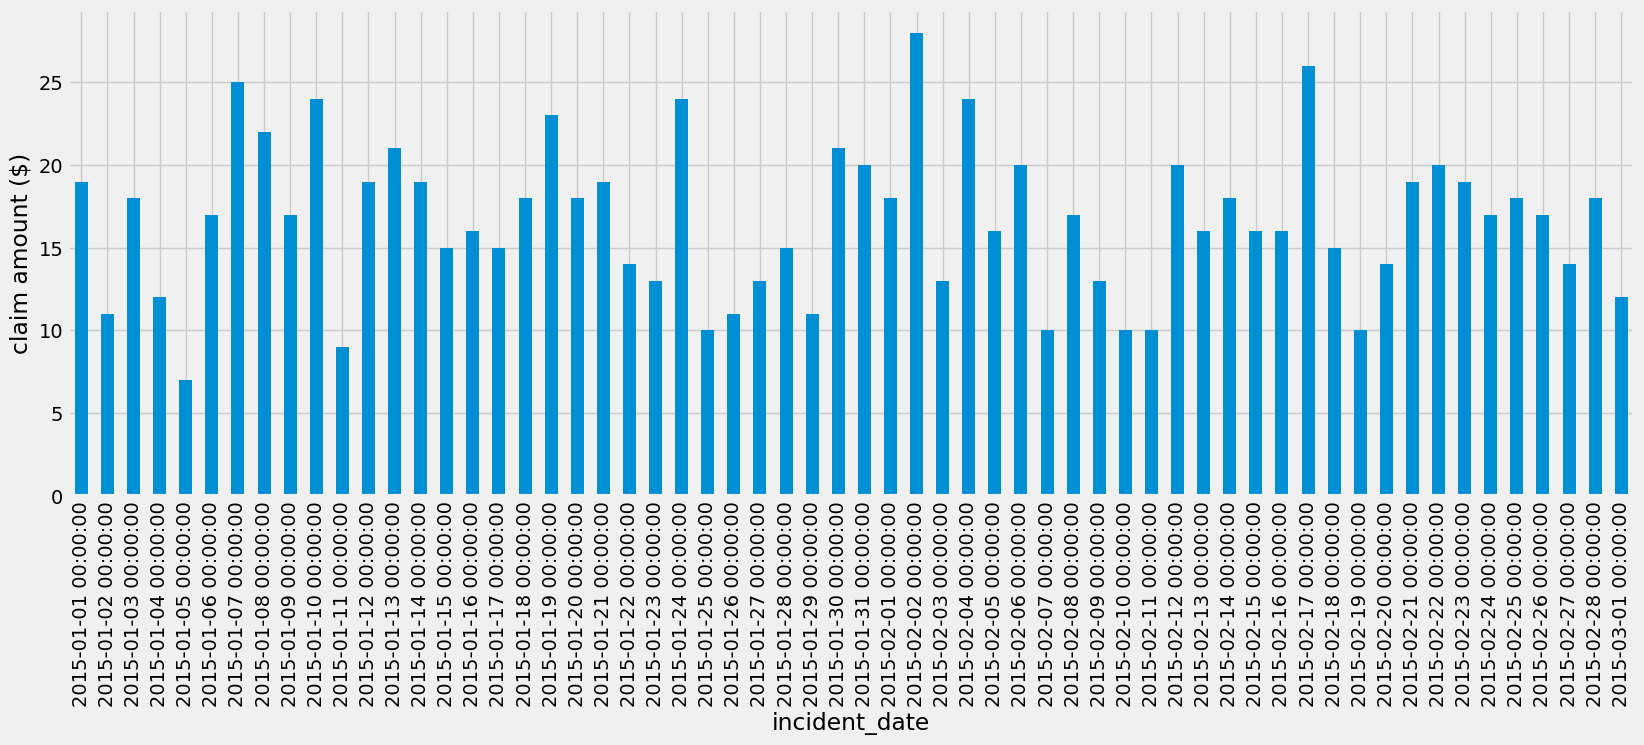

In [4]:
fig=plt.figure(figsize=(18,6))
ax=df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('claim amount ($)')
plt.show()

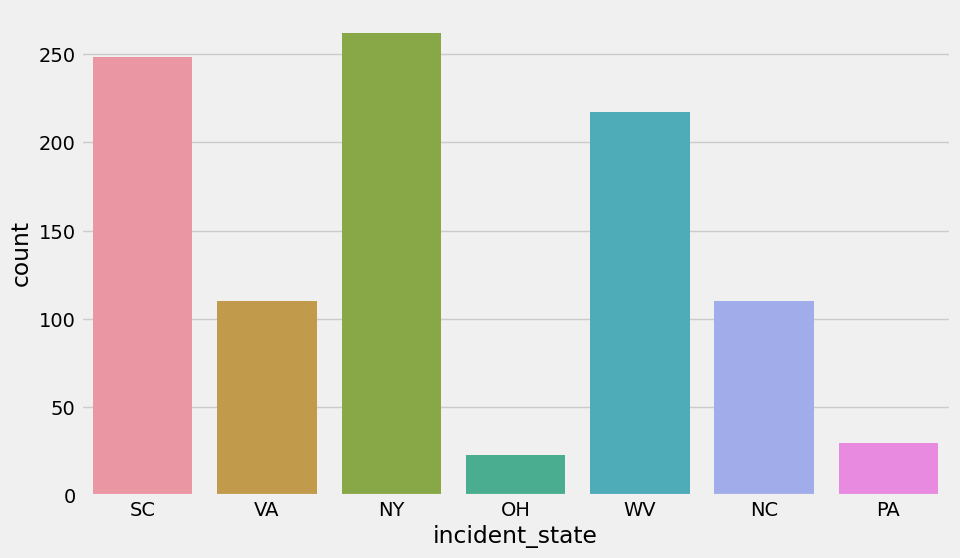

In [5]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='incident_state',data=df)
plt.show()


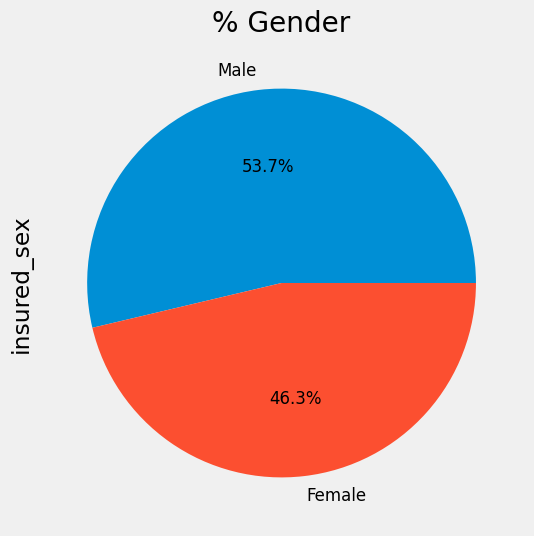

In [6]:

fig=plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0/len(df)).plot.pie(autopct='%.1f%%' , labels=['Male','Female'], fontsize=12)
ax.set_title('% Gender')
plt.show()

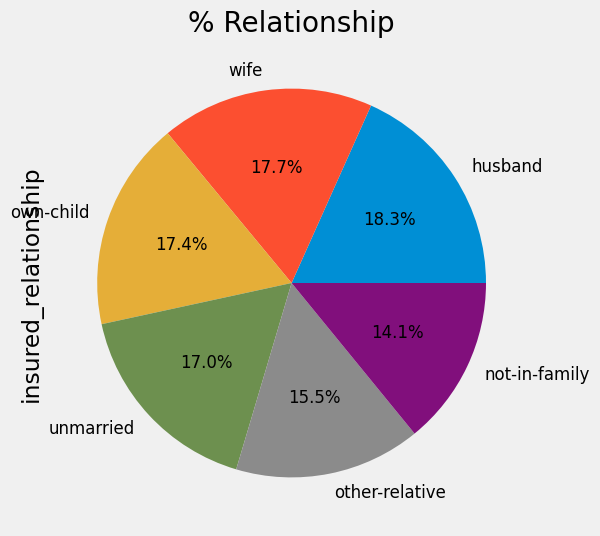

In [7]:
fig=plt.figure(figsize=(10,6))
ax=(df['insured_relationship'].value_counts()*100.0/len(df)).plot.pie(autopct='%.1f%%', labels=['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],fontsize=12)
ax.set_title('% Relationship')
plt.show()

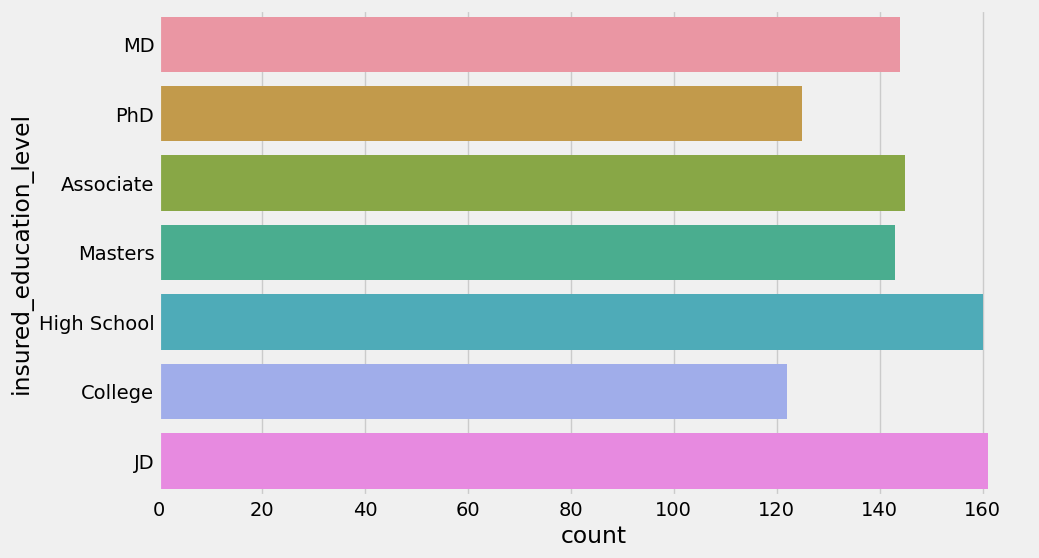

In [8]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N', value=0, inplace=True)
#print(df.head())

#Breakdown of Average vehicle claim by insured person's education, grouped by fraud reported
#Policy annual Premium
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(y='insured_education_level',data=df)
plt.show()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


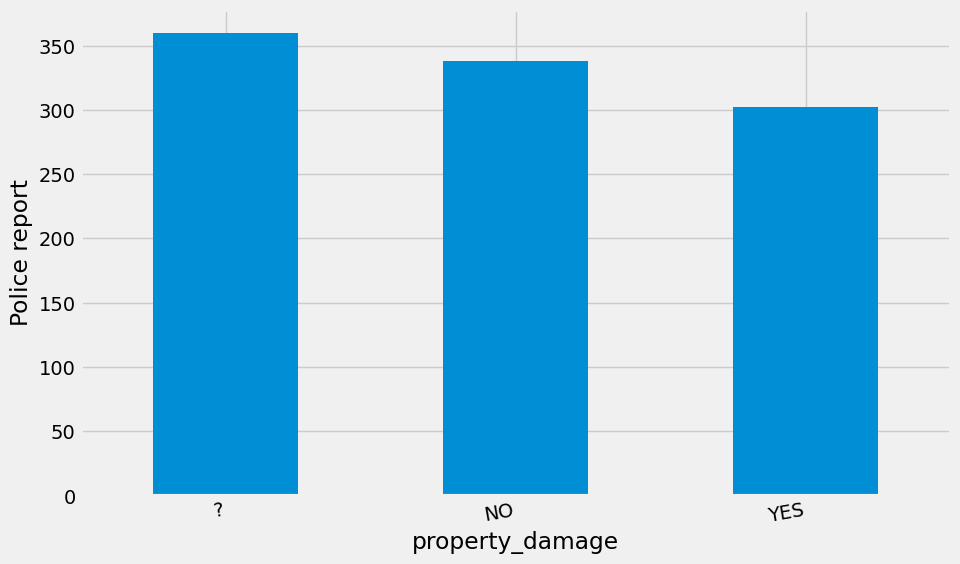

In [9]:



#Property damage
print(df.property_damage.value_counts())
fig=plt.figure(figsize=(10,6))
ax=df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()


   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

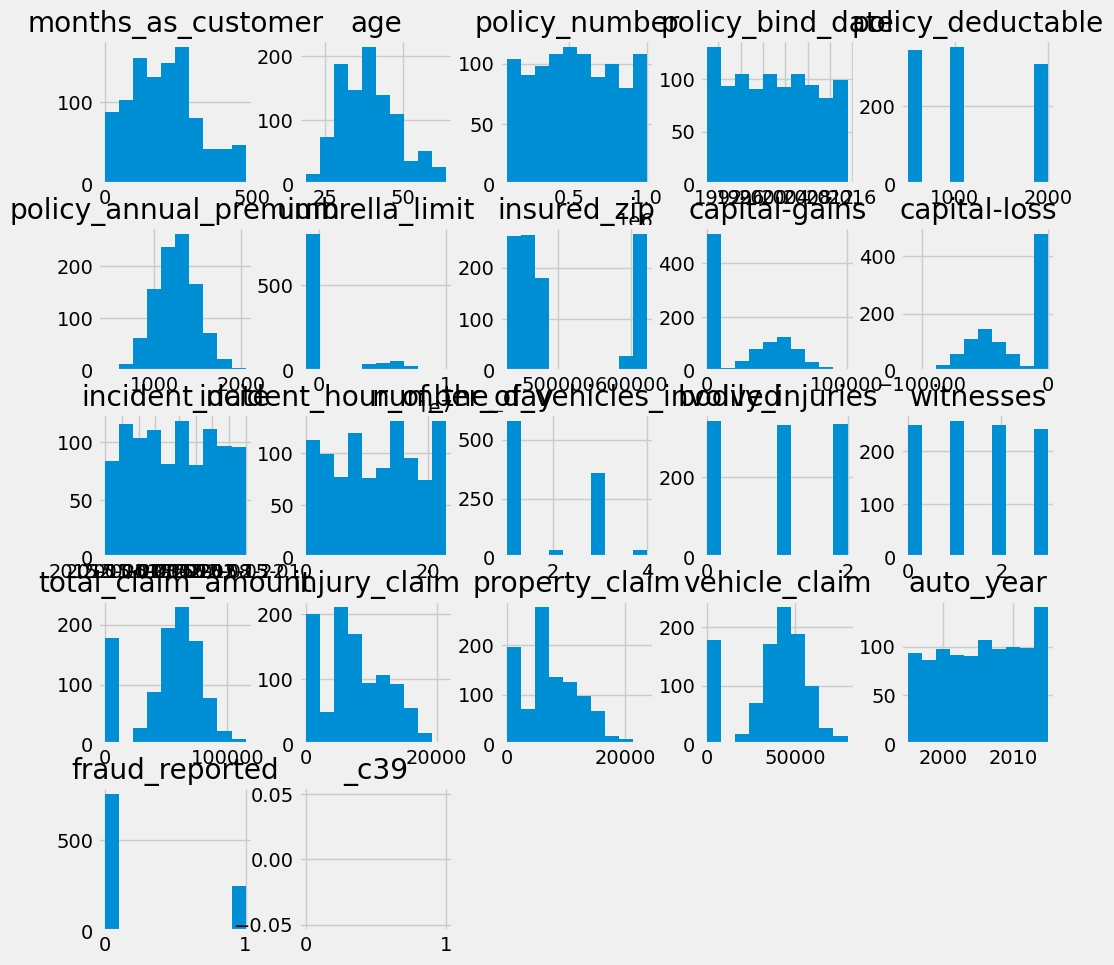

months_as_customer             2.039540e+02
age                            3.894800e+01
policy_number                  5.462386e+05
policy_deductable              1.136000e+03
policy_annual_premium          1.256406e+03
umbrella_limit                 1.101000e+06
insured_zip                    5.012145e+05
capital-gains                  2.512610e+04
capital-loss                  -2.679370e+04
incident_hour_of_the_day       1.164400e+01
number_of_vehicles_involved    1.839000e+00
bodily_injuries                9.920000e-01
witnesses                      1.487000e+00
total_claim_amount             5.276194e+04
injury_claim                   7.433420e+03
property_claim                 7.399570e+03
vehicle_claim                  3.792895e+04
auto_year                      2.005103e+03
fraud_reported                 2.470000e-01
_c39                                    NaN
dtype: float64


<ipython-input-10-a2aad22e2bb1>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df.mean())
<ipython-input-10-a2aad22e2bb1>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


In [10]:
import pandas as pd
import matplotlib.pyplot as plt


print(df.head())
print('Data descrption:', df.describe())
print(df.dtypes)
print("Data set shape: ",df.shape)
print("Policy annual premium mean= ",df.policy_annual_premium.mean())

#select first 100 rows
df1=df[:100]
print("first 100 rows")
print(df1.describe())
print("Policy annual premium mean= ",df1.policy_annual_premium.mean())

#Data Validation

#Printing respective histograms
print(df.hist(figsize=(11,11)))
plt.show()

print(df.mean())

In [11]:
import numpy as np
import pandas as pd



df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N', value=0, inplace=True)
#print(df.head())

print(df.police_report_available.value_counts())
print(df.columns)
print(df.select_dtypes(include=['object']).columns) # checking categorcial columns


df[['insured_zip']] = df[['insured_zip']].astype(object)
print(df.auto_year.value_counts()) # check the spread of years to decide on further action.
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value
bins = [-1, 3, 6, 9, 12, 17, 20, 24] # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening','night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins,labels=names).astype(object)
# Check on categorical variables:
df.select_dtypes(include=['object']).columns # checking categorcial columns

# dropping unimportant columns
df = df.drop(columns = [ 'insured_zip', 'policy_bind_date', 'incident_date', 'incident_location',
'_c39', 'auto_year', 'incident_hour_of_the_day'])

# identify variables with '?' value
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')


dummies = pd.get_dummies(df[['policy_state','policy_csl', 'insured_sex', 'insured_education_level','insured_occupation',
'insured_hobbies', 'insured_relationship','incident_type', 'incident_severity', 'incident_state', 'incident_city',
'auto_make','auto_model', 'incident_period_of_day']])

dummies = dummies.join(df[[ 'collision_type', 'property_damage', 'police_report_available',
 "fraud_reported"]])
print(dummies.head())
X=dummies.iloc[:,0:-1]
y=dummies.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X['property_damage'].replace(to_replace='YES', value=1,inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)
X = X.drop(columns = ['collision_type'])
X = pd.concat([X, df._get_numeric_data()], axis=1) # joining numeric columns
X = X.drop(columns = ['fraud_reported'])

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())



?      343
NO     343
YES    314
Name: police_report_available, dtype: int64
Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')
Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_

length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  80.0
Baseline: Recall:  54.1

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       139
           1       0.73      0.54      0.62        61

    accuracy                           0.80       200
   macro avg       0.78      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200

Confusion matrix
[[127  12]
 [ 28  33]]


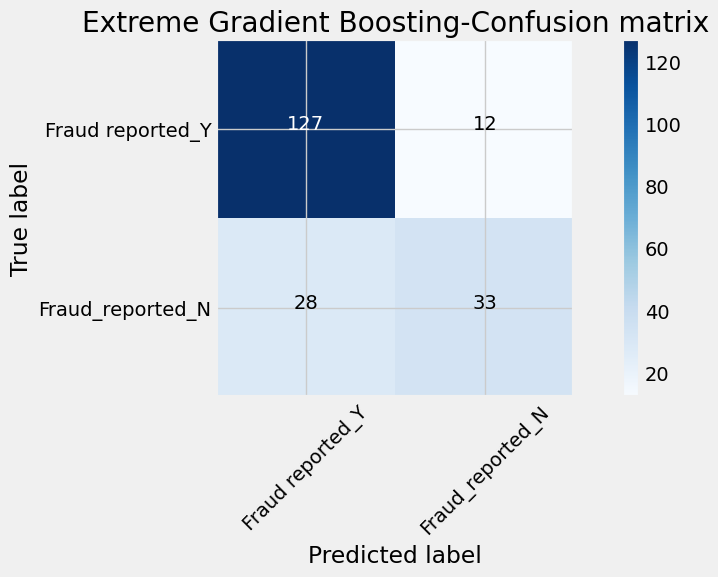

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline Extreme Gradient Boosting based Model

xgb = XGBClassifier(scale_pos_weight=(1 - y_test.mean()), n_jobs=-1)
rfcg = xgb.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='Extreme Gradient Boosting-Confusion matrix')
plt.show()





length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  75.5
Baseline: Recall:  40.98

 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       139
           1       0.66      0.41      0.51        61

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200

Confusion matrix
[[126  13]
 [ 36  25]]


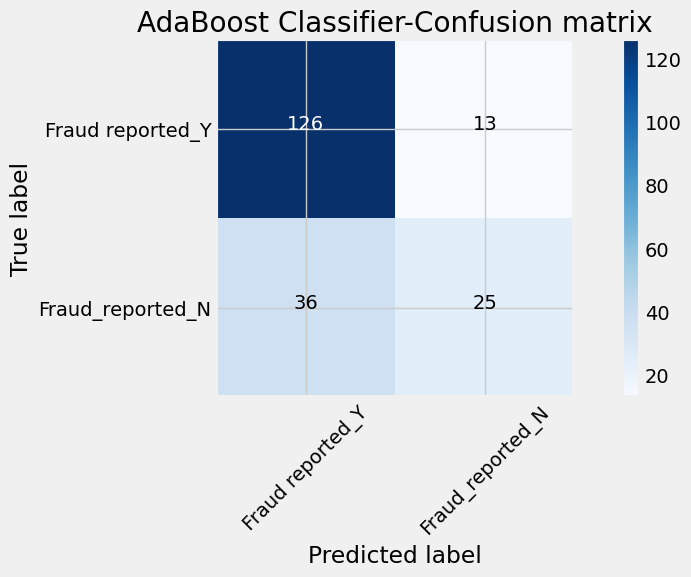

In [15]:
from sklearn.model_selection import train_test_split
#import SAFF
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline AdaBoost based Model

ab = AdaBoostClassifier()
rfcg = ab.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='AdaBoost Classifier-Confusion matrix')
plt.show()



length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  82.5
Baseline: Recall:  65.57

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       139
           1       0.74      0.66      0.70        61

    accuracy                           0.82       200
   macro avg       0.80      0.78      0.79       200
weighted avg       0.82      0.82      0.82       200

Confusion matrix
[[125  14]
 [ 21  40]]


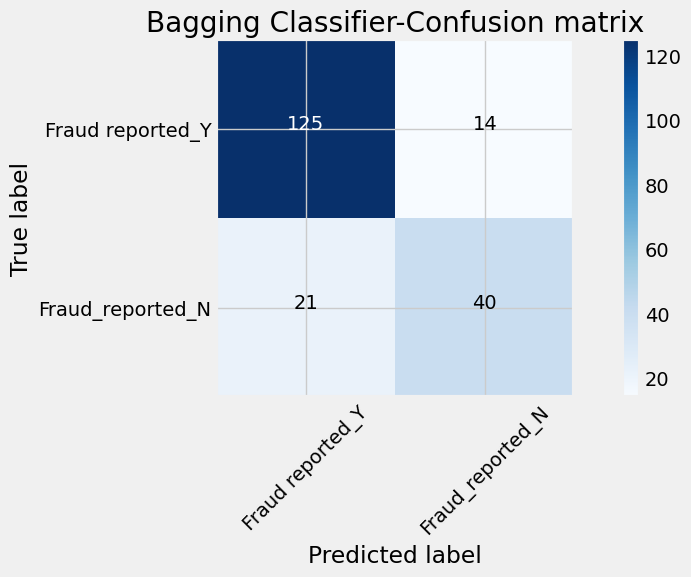

In [16]:
from sklearn.model_selection import train_test_split
#import SAFF
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline Gradient Boost based Model

bc = BaggingClassifier()
rfcg = bc.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='Bagging Classifier-Confusion matrix')
plt.show()





length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  81.5
Baseline: Recall:  62.3

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       139
           1       0.73      0.62      0.67        61

    accuracy                           0.81       200
   macro avg       0.79      0.76      0.77       200
weighted avg       0.81      0.81      0.81       200

Confusion matrix
[[125  14]
 [ 23  38]]


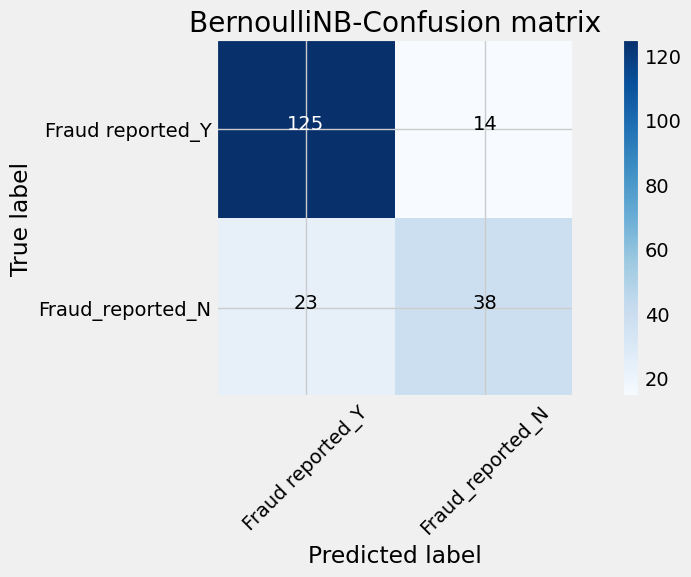

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline BernoulliNB based Model

ab = BernoulliNB()
rfcg = ab.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='BernoulliNB-Confusion matrix')
plt.show()





length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  81.0
Baseline: Recall:  63.93

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       139
           1       0.71      0.64      0.67        61

    accuracy                           0.81       200
   macro avg       0.78      0.76      0.77       200
weighted avg       0.81      0.81      0.81       200

Confusion matrix
[[123  16]
 [ 22  39]]


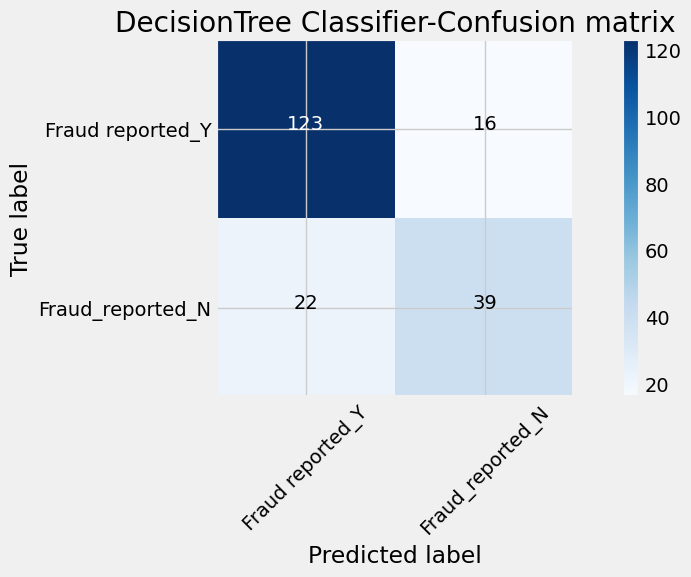

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline DecisionTree based Model

dt = DecisionTreeClassifier()
rfcg = dt.fit(X_train, y_train)  # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions) * 100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions) * 100, 2))
print('\n Classification Report:\n', classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np


# Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y', 'Fraud_reported_N'],
                      title='DecisionTree Classifier-Confusion matrix')
plt.show()

length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  81.0
Baseline: Recall:  59.02

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       139
           1       0.73      0.59      0.65        61

    accuracy                           0.81       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.80      0.81      0.80       200

Confusion matrix
[[126  13]
 [ 25  36]]


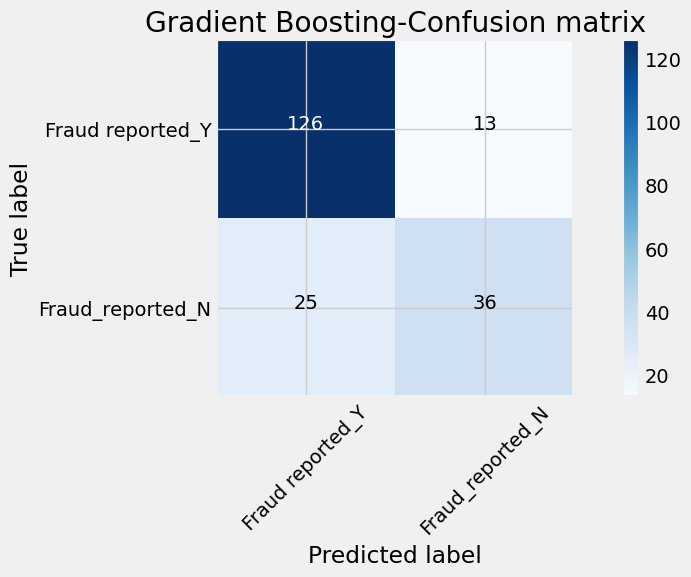

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline Gradient Boost based Model

gbc = GradientBoostingClassifier()
rfcg = gbc.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='Gradient Boosting-Confusion matrix')
plt.show()





length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  69.0
Baseline: Recall:  16.39

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       139
           1       0.48      0.16      0.24        61

    accuracy                           0.69       200
   macro avg       0.60      0.54      0.52       200
weighted avg       0.64      0.69      0.63       200

Confusion matrix
[[128  11]
 [ 51  10]]


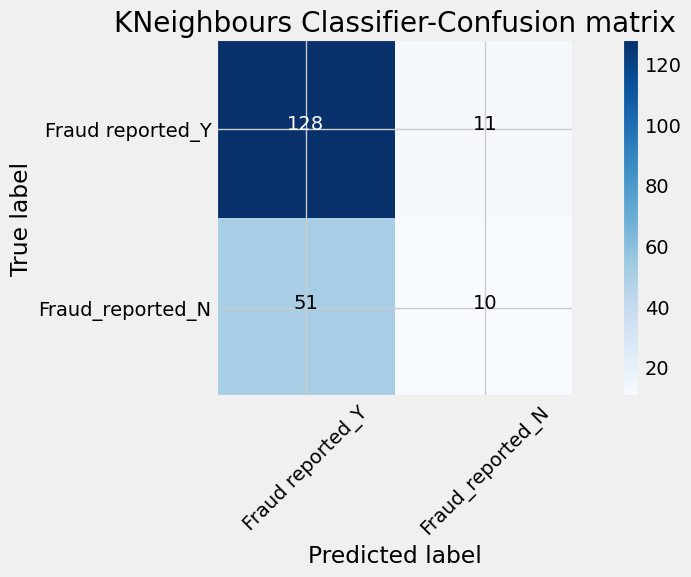

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline SVM based Model

kn = KNeighborsClassifier()
rfcg = kn.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='KNeighbours Classifier-Confusion matrix')
plt.show()

length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  82.0
Baseline: Recall:  62.3

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       139
           1       0.75      0.62      0.68        61

    accuracy                           0.82       200
   macro avg       0.80      0.76      0.78       200
weighted avg       0.81      0.82      0.82       200

Confusion matrix
[[126  13]
 [ 23  38]]


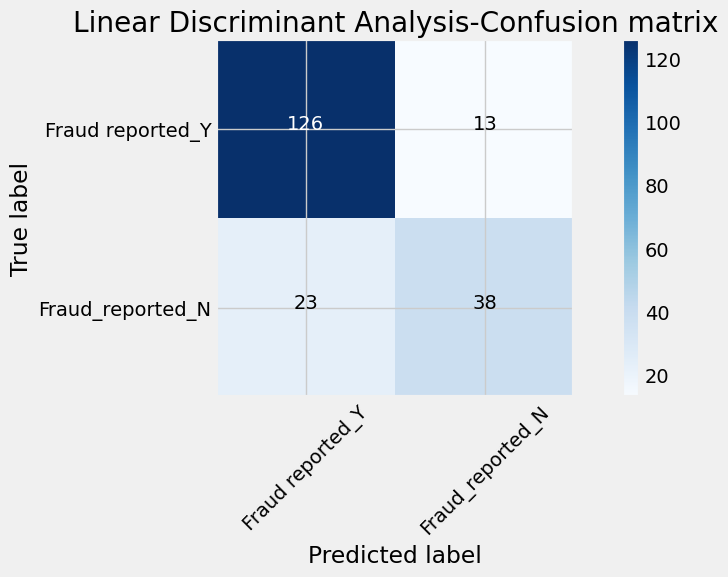

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics


# Baseline Linear Discriminant Analysis based Model

ln = LinearDiscriminantAnalysis()
rfcg = ln.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='Linear Discriminant Analysis-Confusion matrix')
plt.show()

length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  69.5
Baseline: Recall:  0.0

 Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       139
           1       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200

Confusion matrix
[[139   0]
 [ 61   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

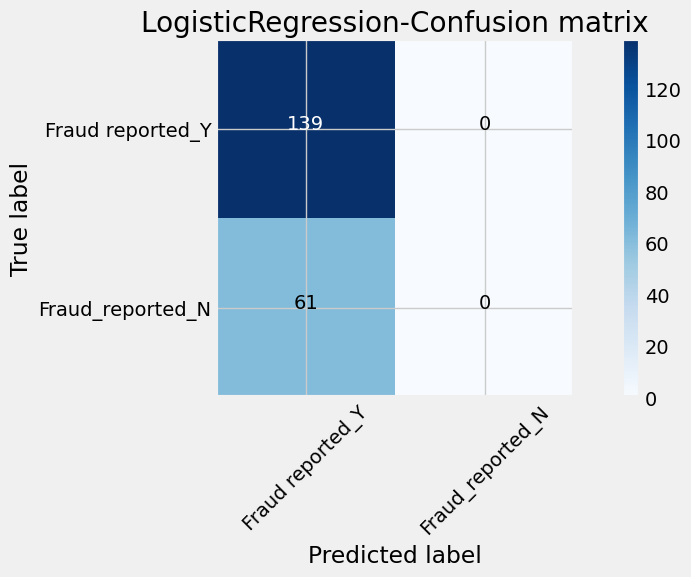

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline Random forest based Model

lg = LogisticRegression()
rfcg = lg.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='LogisticRegression-Confusion matrix')
plt.show()

length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  75.5
Baseline: Recall:  27.87

 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.85       139
           1       0.77      0.28      0.41        61

    accuracy                           0.76       200
   macro avg       0.76      0.62      0.63       200
weighted avg       0.76      0.76      0.71       200

Confusion matrix
[[134   5]
 [ 44  17]]


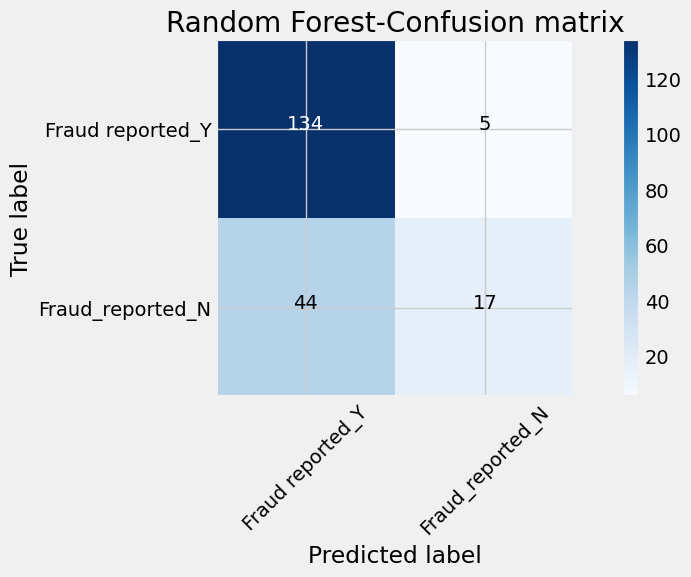

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline Random forest based Model

rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfcg = rfc.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))


from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'], title='Random Forest-Confusion matrix')
plt.show()



length of X-train and X_test:  800 200
length of y_train and y_test:  800 200
Baseline: N_features:  156
Baseline: Accuracy:  69.5
Baseline: Recall:  0.0

 Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       139
           1       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200

Confusion matrix
[[139   0]
 [ 61   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


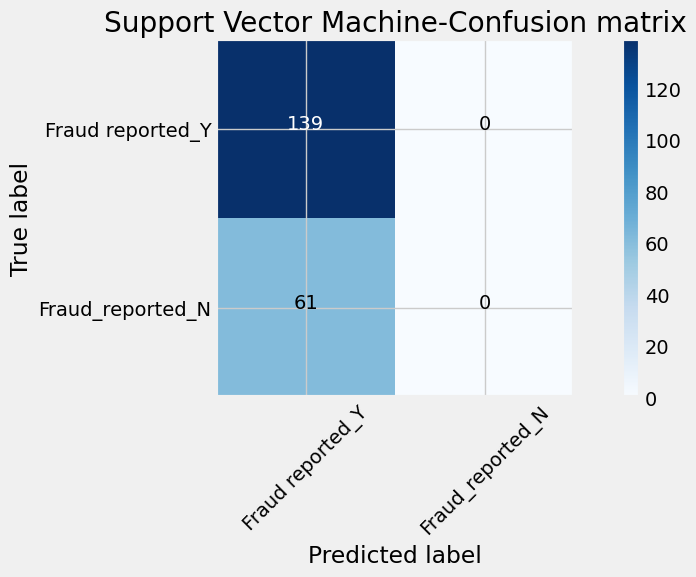

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1234)
print('length of X-train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ',len(y_train), len(y_test))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn import metrics

# Baseline SVM based Model

ls = SVC()
rfcg = ls.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#Evaluation of Model - Confusion Matrix Plot

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):

    print('Confusion matrix')
    print(cm)
    fig = plt.figure(figsize=(10, 6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
title='Support Vector Machine-Confusion matrix')
plt.show()



